## Exercise template for student activity within TOF 
To be presented: 19th of May 2020


# Polarization state engineering - classical vs quantum 
References to be used: 

- Resources on the TOF moodle page (polarization paradox, dirac notation, qm concept)

- Mark Becks book "Quantum Mechanics - Theory and experiment" (two state description, jones calculus)

- Dawes QMlabs page and examples therein (jupyter notebook)

- Examples from the qutip project page (for working with the bloch sphere )

## Problems to be addressed:

1. When considering light polarization experiments: what is the difference (technically and concept) between classical and quantum description of probabilities ?

2. For Dirac's polarization paradoxon, calculate the classical and quantum probabilities, for a particular case (A, B, C, D, as below) implementation.

3. Insert in the middle a HWP retarder, and create a graphic for a 360 deg rotation

4. Insert in the middle a QWP retarder, and create a graphic for a 360 deg rotation

4. Create the visualization of the Bloch sphere of the two situations.

Case A: Emitter H, Detector A 

Case B: Emitter V, Detector D

Case C:Emitter D, Detector H

Case D:Emitter A, Detector V




In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import math

Initial polarization state definitions from Dawes:

In [2]:
H = Qobj([[1],[0]])
V = Qobj([[0],[1]])
D = Qobj([[1/np.sqrt(2)],[1/np.sqrt(2)]])
A = Qobj([[1/np.sqrt(2)],[-1/np.sqrt(2)]])
R = Qobj([[1/np.sqrt(2)],[-1j/np.sqrt(2)]])
L = Qobj([[1/np.sqrt(2)],[1j/np.sqrt(2)]])

In [3]:
bracket = pow(np.absolute((V.dag() * A)),2)        #  bra de emissor (V) aplicado ao cket de detector (D)

Device / Operator definitions from Dawes:

HWP - Half-wave plate axis at $\theta$ to the horizontal

LP - Linear polarizer, axis at $\theta$

QWP - Quarter-wave plate, axis at $\theta$

In [4]:
def HWP(theta):
    return Qobj([[math.cos(2*theta),math.sin(2*theta)],[math.sin(2*theta),-math.cos(2*theta)]]).tidyup()

In [5]:
def LP(theta):
    return Qobj([[math.cos(theta)**2,math.cos(theta)*math.sin(theta)],[math.sin(theta)*math.cos(theta),math.sin(theta)**2]]).tidyup()

In [6]:
def QWP(theta):
    return Qobj([[math.cos(theta)**2 + 1j*math.sin(theta)**2,
                 (1-1j)*math.sin(theta)*math.cos(theta)],
                [(1-1j)*math.sin(theta)*math.cos(theta),
                 math.sin(theta)**2 + 1j*math.cos(theta)**2]]).tidyup()

In [7]:
HWP(math.pi/4) * HWP(math.pi/4)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 1.]]

In [28]:
Ang = [0,math.pi/24,math.pi/16,math.pi/12,math.pi/6,5*math.pi/24,math.pi/8,3*math.pi/16,math.pi/4,7*math.pi/24,5*math.pi/16,math.pi/3, 3*math.pi/8,5*math.pi/12, 7*math.pi/16,11*math.pi/24,math.pi/2,9*math.pi/16]
g = [0,7.5,11.25,15,30,37.5,22.5,33.75,45,52.5,56.25,60,67.5,75,78.75,82.5, 90,101.25] 

In [29]:
r = []
for x in Ang:

    r.append(pow(np.absolute((V.dag() * HWP(x) * A)),2))

[[0.5]] [[0.75]] [[0.85355339]] [[0.9330127]] [[0.9330127]] [[0.75]] [[1.]] [[0.85355339]] [[0.5]] [[0.25]] [[0.14644661]] [[0.0669873]] [[0.]] [[0.0669873]] [[0.14644661]] [[0.25]] [[0.5]] [[0.85355339]]
[0.5]
[0.4999999999999999, 0.7499999999999999, 0.8535533905932735, 0.9330127018922192, 0.9330127018922192, 0.7499999999999999, 0.9999999999999998, 0.8535533905932737, 0.4999999999999999, 0.2500000000000001, 0.1464466094067262, 0.06698729810778076, 0.0, 0.06698729810778069, 0.14644660940672613, 0.24999999999999967, 0.4999999999999999, 0.8535533905932737]


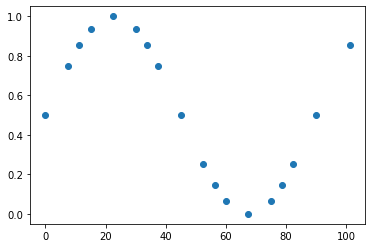

In [30]:
print(*r)
t =[]
for i in range(len(Ang)):
    t.append(r[i][0][0])
print(r[0][0])
print(t)
plt.scatter(g,t,marker='o')

In [31]:

q = []
for x in Ang:

    q.append(pow(np.absolute((V.dag() * QWP(x) * A)),2))

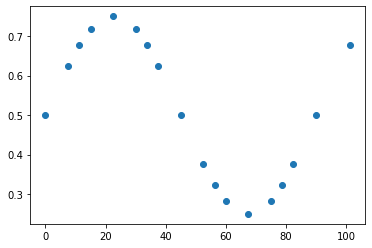

In [32]:
u =[]
for i in range(len(Ang)):
    u.append(q[i][0][0])
plt.scatter(g,u,marker='o')

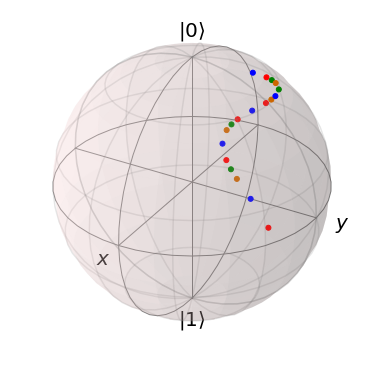

In [33]:
b = Bloch()

xz = np.zeros(len(Ang))

yz = [np.sin(th) for th in u]

zz = [np.cos(th) for th in Ang]

b.add_points([xz, yz, zz,],'m') # no 'm'

b.show()

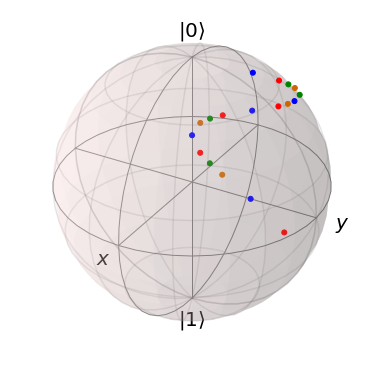

In [34]:
b = Bloch()

xz = np.zeros(len(Ang))

yz = [np.sin(th) for th in t]

zz = [np.cos(th) for th in Ang]

b.add_points([xz, yz, zz,],'m') # no 'm'

b.show()